In [ ]:
!pip install atoti
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.9/145.9 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attemp

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
p_entries   = '/content/gdrive/MyDrive/ER_Schema/Entries.csv'
p_tags      = '/content/gdrive/MyDrive/ER_Schema/Tags.csv'
p_alias     = '/content/gdrive/MyDrive/ER_Schema/Alias.csv'
p_cities    = '/content/gdrive/MyDrive/ER_Schema/Cities.csv'
p_countries = '/content/gdrive/MyDrive/ER_Schema/Countries.csv'
p_addresses = '/content/gdrive/MyDrive/ER_Schema/IP_Addresses.csv'

In [ ]:
import pandas as pd
import os

# Create Tables



In [ ]:
import atoti as tt

session = tt.Session()

Welcome to Atoti 0.8.7!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

Atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, you can request a trial license at https://www.atoti.io/evaluation-license-request.

You can hide this message by setting the `ATOTI_HIDE_EULA_MESSAGE` environment variable to True.


In [ ]:
entries_df = pd.read_csv(p_entries)

entries_df['first_seen'] = pd.to_datetime(entries_df['first_seen'], utc=True)
entries_df['last_seen']  = pd.to_datetime(entries_df['last_seen'], utc=True)

entries_df.head()

,ID_ENTRY,source,ioc,ioc_type,threat_type,malware,ip,first_seen,last_seen,status,reporter
0,2711899.0,URL Haus,https://kld.workout.oystergardener.net/editCon...,url,payload_delivery,FAKEUPDATES,NaN,2023-09-15 15:11:08+00:00,2023-09-15 15:11:08+00:00,offline,Cryptolaemus1
1,2711898.0,URL Haus,http://178.141.204.195:38244/Mozi.m,url,payload_delivery,Mozi,178.141.204.195,2023-09-15 15:03:04+00:00,2023-09-15 15:03:04+00:00,offline,Gandylyan1
2,2711896.0,URL Haus,http://mail.treeoflifeadventures.com/wp-conten...,url,payload_delivery,Nanocore RAT,NaN,2023-09-15 13:33:07+00:00,2023-09-15 13:56:00+00:00,offline,James_inthe_box
3,2711895.0,URL Haus,http://galandskiyher2.com/downloads/toolspub3.exe,url,payload_delivery,Stealc,NaN,2023-09-15 13:18:06+00:00,2023-09-15 14:54:39+00:00,online,vxvault
4,2711893.0,URL Haus,http://galandskiyher2.com/downloads/toolspub2.exe,url,payload_delivery,Stealc,NaN,2023-09-15 13:07:06+00:00,2023-09-15 15:10:11+00:00,online,vxvault


### ENTRIES

In [ ]:
import pandas as pd
import os

In [ ]:
entry_keys = ['ID_ENTRY', 'source']

column_types = {
    'first_seen': tt.type.ZONED_DATE_TIME,
    'last_seen': tt.type.ZONED_DATE_TIME,
}

# Check if the file exists
if not os.path.exists(p_entries):
    print(f"Error: File not found at {p_entries}")
else:
    table_name = "entries"
    entries = session.read_pandas(entries_df, table_name=table_name, keys = entry_keys)

In [ ]:
entries.head(2)

,,ioc,ioc_type,threat_type,malware,ip,first_seen,last_seen,status,reporter
ID_ENTRY,source,,,,,,,,,
2711899.0,URL Haus,https://kld.workout.oystergardener.net/editCon...,url,payload_delivery,FAKEUPDATES,N/A,2023-09-15 15:11:08+00:00,2023-09-15 15:11:08+00:00,offline,Cryptolaemus1
2711896.0,URL Haus,http://mail.treeoflifeadventures.com/wp-conten...,url,payload_delivery,Nanocore RAT,N/A,2023-09-15 13:33:07+00:00,2023-09-15 13:56:00+00:00,offline,James_inthe_box


### TAGS

In [ ]:
tags_df = pd.read_csv(p_tags)
tags_df['index'] = tags_df.index

tags_df.head()

,ID_ENTRY,source,tag,index
0,2704827,URL Haus,SocGholish,0
1,2704829,URL Haus,Mozi,1
2,2704830,URL Haus,Mozi,2
3,2704831,URL Haus,Mozi,3
4,2704832,URL Haus,Mozi,4


In [ ]:
tag_keys = ['index']

# Check if the file exists
if not os.path.exists(p_tags):
    print(f"Error: File not found at {p_tags}")
else:
    table_name = "tags"
    tags = session.read_pandas(tags_df, table_name=table_name, keys = tag_keys)

In [ ]:
tags.head(2)

,ID_ENTRY,source,tag
index,,,
1,2704829,URL Haus,Mozi
3,2704831,URL Haus,Mozi


### ALIAS

In [ ]:
alias_keys = ['malware']

# Check if the file exists
if not os.path.exists(p_alias):
    print(f"Error: File not found at {p_alias}")
else:
    alias = session.read_csv(p_alias, keys = alias_keys)

In [ ]:
alias.head(2)

,alias
malware,
DCRat,DarkCrystal RAT
NetSupportManager RAT,NetSupport


### IP ADDRESSES

In [ ]:
address_keys = ['ip']

# Check if the file exists
if not os.path.exists(p_addresses):
    print(f"Error: File not found at {p_addresses}")
else:
    ip_addresses = session.read_csv(p_addresses, keys = address_keys)

In [ ]:
ip_addresses.head(2)

,latitude,longitude,city
ip,,,
200.81.166.158,-43.249,-65.305,Trelew
194.180.48.254,52.363,4.8924,Amsterdam


### CITIES

In [ ]:
city_keys = ['city']

# Check if the file exists
if not os.path.exists(p_cities):
    print(f"Error: File not found at {p_cities}")
else:
    cities = session.read_csv(p_cities, keys = city_keys)

In [ ]:
cities.head(2)

,country
city,
Nürnberg,DE
Naaldwijk,NL


### COUNTRY

In [ ]:
country_keys = ['country']

# Check if the file exists
if not os.path.exists(p_countries):
    print(f"Error: File not found at {p_countries}")
else:
    countries = session.read_csv(p_countries, keys = country_keys)

In [ ]:
countries.head(2)

,country_name
country,
RU,Russian Federation
FI,Finland


# Create Structures

In [ ]:
entries.join(alias,  entries['malware'] == alias['malware'] )

In [ ]:
entries.join(ip_addresses,  entries['ip'] == ip_addresses['ip'] )

In [ ]:
ip_addresses.join(cities,   ip_addresses['city'] == cities['city'] )

In [ ]:
cities.join(countries, cities['country'] == countries['country'] )

In [ ]:
entries.join(tags, entries['ID_ENTRY'] == tags['ID_ENTRY'])

In [ ]:
entries.join(tags, entries['source'] == tags['source'])

In [ ]:
cube = session.create_cube(entries)

In [ ]:
cube.create_date_hierarchy(
    "Date_first_seen",
    column=entries["first_seen"],
    levels={"Year": "yyyy", "Quarter": "QQQ", "Month": "MMM", "Day": "dd"},
)

In [ ]:
cube.create_date_hierarchy(
    "Date_last_seen",
    column=entries["last_seen"],
    levels={"Year": "yyyy", "Quarter": "QQQ", "Month": "MMM", "Day": "dd"},
)

In [ ]:
h, l, m = cube.hierarchies, cube.levels, cube.measures

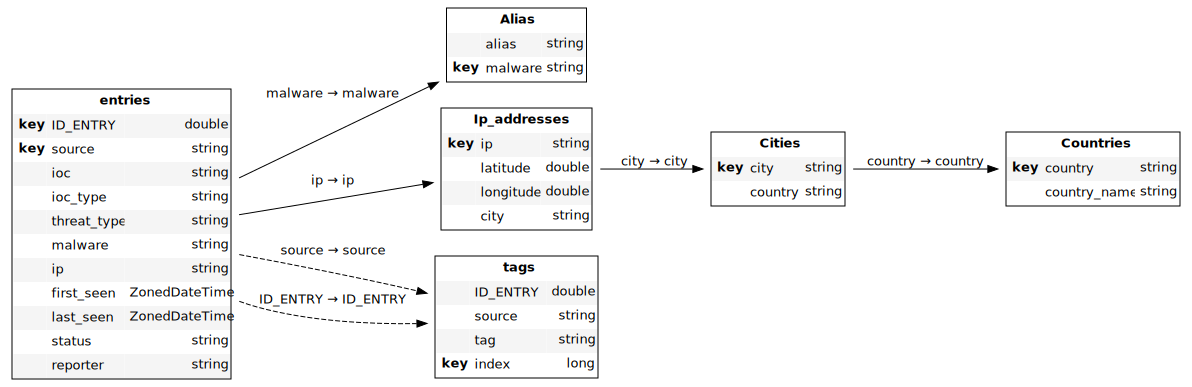

In [ ]:
cube.schema

In [ ]:
h

{('entries', 'last_seen'): <atoti.hierarchy.Hierarchy object at 0x7f7316264640>, ('Ip_addresses', 'city'): <atoti.hierarchy.Hierarchy object at 0x7f73162646d0>, ('tags', 'source'): <atoti.hierarchy.Hierarchy object at 0x7f73162647c0>, ('entries', 'Date_last_seen'): <atoti.hierarchy.Hierarchy object at 0x7f7316264a00>, ('entries', 'source'): <atoti.hierarchy.Hierarchy object at 0x7f7316264ee0>, ('entries', 'ioc'): <atoti.hierarchy.Hierarchy object at 0x7f7316267f70>, ('entries', 'Date_first_seen'): <atoti.hierarchy.Hierarchy object at 0x7f7316264430>, ('Cities', 'country'): <atoti.hierarchy.Hierarchy object at 0x7f7316270190>, ('entries', 'ip'): <atoti.hierarchy.Hierarchy object at 0x7f73162704c0>, ('entries', 'reporter'): <atoti.hierarchy.Hierarchy object at 0x7f73162705b0>, ('entries', 'ioc_type'): <atoti.hierarchy.Hierarchy object at 0x7f73162706a0>, ('entries', 'status'): <atoti.hierarchy.Hierarchy object at 0x7f7316270790>, ('Alias', 'alias'): <atoti.hierarchy.Hierarchy object at 0x7f7316270880>, ('tags', 'index'): <atoti.hierarchy.Hierarchy object at 0x7f7316270970>, ('entries', 'ID_ENTRY'): <atoti.hierarchy.Hierarchy object at 0x7f7316270a60>, ('Countries', 'country_name'): <atoti.hierarchy.Hierarchy object at 0x7f7316270b50>, ('tags', 'tag'): <atoti.hierarchy.Hierarchy object at 0x7f7316270c40>, ('entries', 'malware'): <atoti.hierarchy.Hierarchy object at 0x7f7316270d30>, ('entries', 'threat_type'): <atoti.hierarchy.Hierarchy object at 0x7f7316270e20>, ('entries', 'first_seen'): <atoti.hierarchy.Hierarchy object at 0x7f7316270f10>}

In [ ]:
l

In [ ]:
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x7f731621ff70>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x7f73162102b0>}

# Queries

### Most Entries per Day

In [ ]:
#_df1 = cube.query(m["contributors.COUNT"], levels=[l[('entries', 'Date_first_seen', 'Day')]])
_df1 = cube.query(m["contributors.COUNT"], levels=[ l['entries', 'source', 'source'], l[('entries', 'Date_first_seen', 'Day')]])

_df1

contributors.COUNT
Year Quarter Month Day                   
2023 Q3      Aug   16                 162
                   17                 124
                   18                  71
                   19                  98
                   20                 170
                   21                 142
                   22                 168
                   23                 198
                   24                 237
                   25                 343
                   26                 196
                   27                 160
                   28                 180
                   29                 147
                   30                 211
                   31                 160
             Sep   01                 135
                   02                 172
                   03                 150
                   04                 327
                   05                 123
                   06                 146
                   07                 196
                   08                 254
                   09                 328
                   10               6,729
                   11                 458
                   12                 454
                   13                 354
                   14                 298
                   15                 173

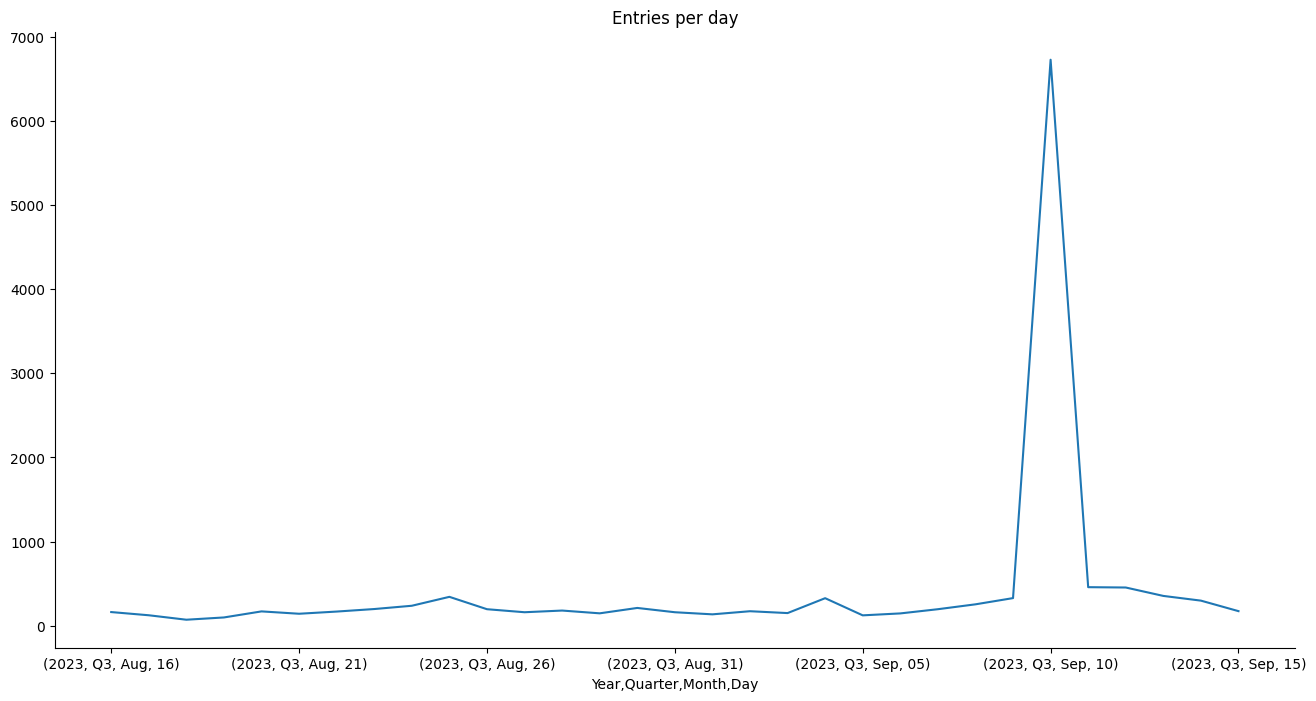

In [ ]:
from matplotlib import pyplot as plt
_df1_source1 = _df1[_df1['source'] == 'Threat Fox']
_df1_source2 = _df1[_df1['source'] == 'URL Haus']
_df1_source3 = _df1[_df1['source'] == 'Feodo Tracker']

_df1_source1['contributors.COUNT'].plot(kind='line', figsize=(16, 8), title='Entries per day grouped by source', color='blue')
_df1_source2['contributors.COUNT'].plot(kind='line', figsize=(16, 8), color='red')
_df1_source3['contributors.COUNT'].plot(kind='line', figsize=(16, 8), color='green')

plt.gca().spines[['top', 'right']].set_visible(False)


### Most Mentioned Tag

In [ ]:
cube.query(m["contributors.COUNT"], levels=[ l['entries', 'source', 'source'], l['tag']])

contributors.COUNT
source     tag                               
Threat Fox  BRA                            84
            Bitter                          2
            Brute Ratel C4                  2
            CONTABO                         1
            Cerberus                        1
...                                       ...
URL Haus   xlam                             1
           xlsx                             1
           xmrig                            5
           xworm                            7
           zip                             13

[413 rows x 1 columns]


### Most Mentioned Malware

In [ ]:
from datetime import date

In [ ]:
from_date = date(2023, 9, 1)
to_date   = date(2023, 9, 5)

In [ ]:
mentioned_malwares = cube.query(m["contributors.COUNT"], levels=[l["malware"], l[('entries', 'Date_first_seen', 'Day')]])
mentioned_malwares

contributors.COUNT
malware            Year Quarter Month Day                   
Agent Tesla        2023 Q3      Aug   16                   1
                                      17                   6
                                      18                   4
                                      20                   1
                                      21                   1
...                                                      ...
Vjw0rm             2023 Q3      Sep   12                   1
                                      13                   1
WhiteSnake Stealer 2023 Q3      Sep   09                  32
XWorm              2023 Q3      Sep   09                   1
                                      10                 290

[498 rows x 1 columns]

In [ ]:
mm_df = pd.DataFrame(mentioned_malwares).reset_index()

month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
                 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
                 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Convert 'Month' column to numerical representation
mm_df['M'] = mm_df['Month'].map(month_mapping)
mm_df

,malware,Year,Quarter,Month,Day,contributors.COUNT,M
0,Agent Tesla,2023,Q3,Aug,16,1,8
1,Agent Tesla,2023,Q3,Aug,17,6,8
2,Agent Tesla,2023,Q3,Aug,18,4,8
3,Agent Tesla,2023,Q3,Aug,20,1,8
4,Agent Tesla,2023,Q3,Aug,21,1,8
...,...,...,...,...,...,...,...
493,Vjw0rm,2023,Q3,Sep,12,1,9
494,Vjw0rm,2023,Q3,Sep,13,1,9
495,WhiteSnake Stealer,2023,Q3,Sep,09,32,9
496,XWorm,2023,Q3,Sep,09,1,9


In [ ]:
def create_periodic_summary(df, from_date, to_date):

  dataframe = pd.DataFrame()

  for i in range(len(df)):

    year   =  int(df.loc[i]['Year'])
    month  =  df.loc[i]['M']
    day    =  int(df.loc[i]['Day'])

    if( ( year >= int(from_date.year) ) & ( month >= int(from_date.month) ) & ( day >= int(from_date.day) ) & ( int(to_date.year) >= year ) & ( int(to_date.month) >= month ) & ( int(to_date.day) >= day)):

      #print(f'{year}-{month}-{day}')

      malware = df.at[i,'malware']
      counts = df.at[i,'contributors.COUNT']

      data = {
          'malware' : malware,
          '#times' : counts
      }

      row = pd.DataFrame([data])
      dataframe = pd.concat([dataframe, row], ignore_index=True)
  aggregated_df = dataframe.groupby('malware').sum().reset_index()

  return aggregated_df


In [ ]:
summary = create_periodic_summary(mm_df, from_date, to_date )
summary

,malware,#times
0,Agent Tesla,18
1,Amadey,12
2,AsyncRAT,83
3,FAKEUPDATES,10
4,GootLoader,16
5,Houdini,1
6,IRATA,3
7,Lumma Stealer,1
8,Mars Stealer,4
9,Meterpreter,1


<ipython-input-44-621d38c9264f>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')


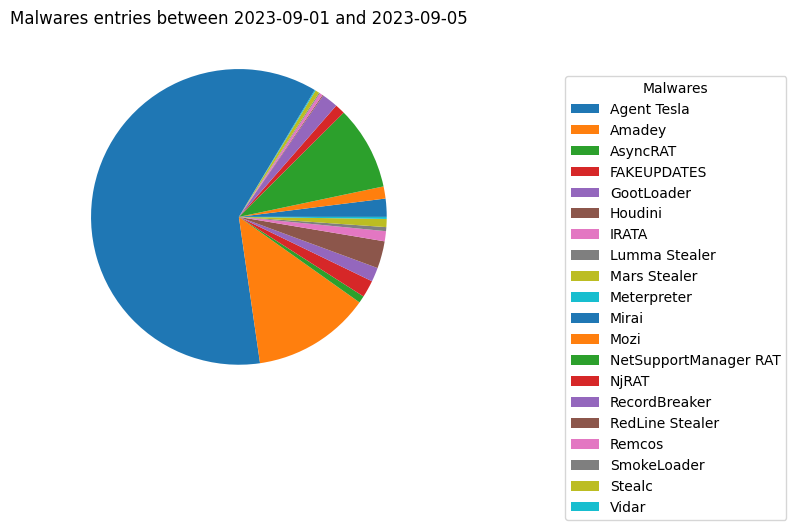

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

cmap = get_cmap('tab10')
colors = cmap(range(len(summary)))

plt.pie(summary['#times'])

plt.legend(summary['malware'], title='Malwares', loc='upper right', bbox_to_anchor=(2, 0.9))

# Add a title
plt.title(f'Malwares entries between {from_date} and {to_date}')

# Muestra el gráfico
plt.show()

In [ ]:
'''
d = date(2023, 9, 11)

filter_condition = (
    (l[('entries', 'Date_first_seen', 'Day')] == d.day)
    & (l[('entries', 'Date_first_seen', 'Month')] == d.month)
    & (l[('entries', 'Date_first_seen', 'Year')] == d.year)
)

m["Entries.period"] = tt.filter(
    m["contributors.COUNT"], filter_condition
)

# Perform the query with the updated filter condition

result = cube.query(
    m["Entries.period"],
)

result
'''

'\nd = date(2023, 9, 11)\n\nfilter_condition = (\n    (l[(\'entries\', \'Date_first_seen\', \'Day\')] == d.day)\n    & (l[(\'entries\', \'Date_first_seen\', \'Month\')] == d.month)\n    & (l[(\'entries\', \'Date_first_seen\', \'Year\')] == d.year)\n)\n\nm["Entries.period"] = tt.filter(\n    m["contributors.COUNT"], filter_condition\n)\n\n# Perform the query with the updated filter condition\n\nresult = cube.query(\n    m["Entries.period"],\n)\n\nresult\n'

### Most Active Reporter

In [ ]:
cube.query(m["contributors.COUNT"], levels=[ l['entries', 'source', 'source'], l['reporter']])

contributors.COUNT
source     reporter                          
Threat Fox 0xrb                             1
           1ZRR4H                         118
           500mk500                       167
           Gi7w0rm                      6,496
           Gootloader2                      8
           Hato0                            8
           Rony                            12
           SarlackLab                      15
           abus3reports                     1
           abuse_ch                       212
           anonymous                        6
           cre4milk                         3
           crep1x                          23
           drb_ra                         614
           g0njxa                          33
           malpulse                       234
           monitorsg                        2
           myonium1                        12
           sicehicetf                       1
           stoerchl                         1
           teamcymru_S2                     1
           vovaan                           6
URL Haus   AndreGironda                     2
           Casperinous                     53
           Ch3tank                          1
           Cryptolaemus1                   76
           ErikGottko                       2
           Gandylyan1                     360
           Gootloader2                    269
           JAMESWT_MHT                     53
           James_inthe_box                 23
           Manu3l_Varela                    3
           OneCert                          3
           SquiblydooBlog                   1
           THProfiler                       1
           TomU                             3
           ULTRAFRAUD                       8
           UkyKnight                        1
           abus3reports                   211
           abuse_ch                       440
           andretavare5                   108
           anonymous                       44
           dms1899                          4
           ffforward                       19
           furry3000                        2
           geenensp                       352
           lrz_urlhaus                    464
           onecert_ir                       8
           pmelson                        136
           tammeto                         22
           tolisec                      1,841
           vmovupd                          2
           vovaan                          13
           vxvault                          8
           zbetcheckin                    557

### Entries for each Country

In [ ]:
cube.query(m["contributors.COUNT"], levels=[l['country_name']],)

,contributors.COUNT
country_name,
Albania,5
Algeria,1
Antarctica,1
Argentina,131
Australia,25
...,...
United Kingdom of Great Britain and Northern I...,157
United States of America,"1,024"
Venezuela (Bolivarian Republic of),4


### Most Active Malware by day

In [ ]:
cube.query(m["contributors.COUNT"], levels=[l['malware'], l['Day'],])

KeyError: ignored

### Most Active Malware by location

In [ ]:
res = cube.query(m["contributors.COUNT"], levels=[l['city'],l['malware']])
dataframe_most_active_malware = pd.DataFrame(res)
dataframe_most_active_malware = dataframe_most_active_malware.reset_index()
dataframe_most_active_malware

In [ ]:
dataframe_ip_addresses = pd.read_csv(p_addresses)
dataframe_ip_addresses = dataframe_ip_addresses[['latitude', 'longitude',	'city']].drop_duplicates().sort_values(by = 'city')
dataframe_ip_addresses = dataframe_ip_addresses
dataframe_ip_addresses

In [ ]:
merged_df = pd.merge(dataframe_most_active_malware, dataframe_ip_addresses, on='city')
merged_df

In [ ]:
!pip install folium plotly geopandas basemap bokeh


### **Fopium**

In [ ]:
import folium

mymap = folium.Map(location=[45.5236, -122.6750], zoom_start=13)

folium.Marker(
    location=[45.5236, -122.6750],
    popup="Hello, this is a marker!",
).add_to(mymap)

mymap

In [ ]:
def create_graph(df):

  df_cities = df[['latitude', 'longitude']].drop_duplicates().reset_index()

  mymap = folium.Map(location=[ 100 , 100], zoom_start= 1)

  for i in range(len(df_cities)):

    longitude =  df.loc[i]['longitude']
    latitude  =  df.loc[i]['latitude']

    malwares = df[ (df['latitude'] == latitude) & (df['longitude'] == longitude) ]
    max_value_index = malwares['contributors.COUNT'].idxmax()

    row_with_max_value = df.loc[max_value_index]

    create_pop_up(row_with_max_value['latitude'], row_with_max_value['longitude'], row_with_max_value['contributors.COUNT'], row_with_max_value['malware'], mymap )

  return mymap

def create_pop_up(latitude, longitude, contributors, malware, mymap):

  folium.Marker(
    location=[latitude, longitude],
    popup=f"{contributors} {malware} entries found",
  ).add_to(mymap)

In [ ]:
create_graph(merged_df)